In [ ]:
import numpy as np
a=np.array([20,30,40,50,60])
b=np.arange(5)
print(b)
c=a-b
print(c)
b**2

[0 1 2 3 4]
[20 29 38 47 56]


array([ 0,  1,  4,  9, 16])

In [ ]:
#ceating random values
p=np.empty(5)
print('p=',p)
a=np.zeros(5)
print('a=',a)
c=np.full(5,8)
print('c=',c)

p= [3.82980900e-315 0.00000000e+000 2.16443571e-312 2.37663529e-312
 2.37151510e-322]
a= [0. 0. 0. 0. 0.]
c= [8 8 8 8 8]


In [ ]:
count=0
forintervar in [3,41,12,9,74]

In [ ]:
d=np.arange(10,20,2)
print('d=',d)

d= [10 12 14 16 18]


In [ ]:
data=np.array([1,2,3,4,5])
print("print the whole matrix:", data[:])
print("print the last two digits of the matrix:", data[-2:])
e=np.array([1,2,3,4])
f=np.array([5,6,7,8])
g=np.concatenate([e,f])
print("g=",g)
h=e+f
print("h=",h)
i=e-f
print("difference=",i)
j=e*f
print("product=",j)
l=e/f
print("l=",l)
i=np.array([[1,2,3,4],[5,6,7,8]])
print("i=",i)

print the whole matrix: [1 2 3 4 5]
print the last two digits of the matrix: [4 5]
g= [1 2 3 4 5 6 7 8]
h= [ 6  8 10 12]
difference= [-4 -4 -4 -4]
product= [ 5 12 21 32]
l= [0.2        0.33333333 0.42857143 0.5       ]
i= [[1 2 3 4]
 [5 6 7 8]]


In [ ]:
import pandas as pd
df=pd.DataFrame({
    "name":['brand orray harris ','alien new wesley','bonnet ms eizebeth'],
            "age":['10','13','15'],
            "sex":['m','m','f']
})
print(df)




                  name age sex
0  brand orray harris   10   m
1     alien new wesley  13   m
2   bonnet ms eizebeth  15   f


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


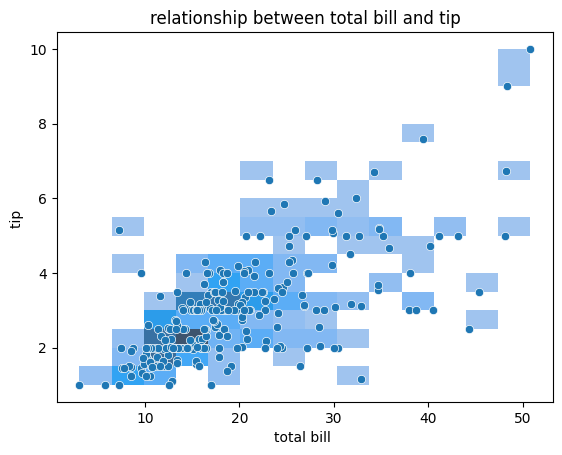

<Axes: xlabel='class', ylabel='fare'>

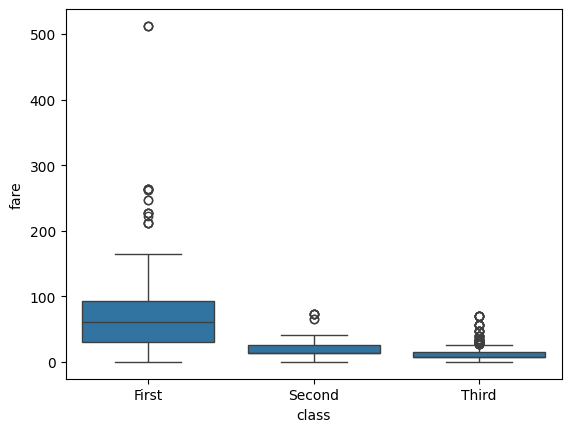

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
df= pd.DataFrame(tips)
print(df)
sns.histplot(y='tip', x= 'total_bill', data=df) # Corrected: added data=df and column names
sns.scatterplot(x='total_bill', y='tip', data=df) # Corrected: specified data and column names
plt.xlabel("total bill ")
plt.ylabel ("tip ")
plt.title ("relationship between total bill and tip") # Corrected typo in 'relationship' and 'bill'
plt.show()
 # boxplot
titanic = sns.load_dataset("titanic")
sns.boxplot(x="class",y="fare", data=titanic) # Corrected: passed DataFrame object to data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from google.colab import files

# Step 1: Upload dataset (student_data.csv from Lab 4) for jupyter file write accordingly
uploaded = files.upload()

# Step 2: Read dataset
# Use the correct filename from the uploaded files
file_name = list(uploaded.keys())[0]
if file_name.endswith(".csv"):
    df = pd.read_csv(file_name, na_values=[" ", "NA", "NaN"])
elif file_name.endswith(".xlsx"):
    df = pd.read_excel(file_name)
else:
    raise ValueError("Unsupported file format")

df.columns = df.columns.str.strip()

print("coloumns are: ", df.columns)
print("Original Dataset:")
print(df)

df["Age"] = df["Age"].fillna(df["Age"].mean()) # calculating the mean of the age coloumn of the data set

scaler_minmax = MinMaxScaler()  # Normalization: values between 0 and 1
scaler_standard = StandardScaler()  # Standardization: mean=0, std=1

# Select numerical columns
num_cols = ["Age", "Marks", "Attendance"]

# Apply MinMax scaling
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df[num_cols]), columns=[col+"_Norm" for col in num_cols])

# Apply Standard scaling
df_standard = pd.DataFrame(scaler_standard.fit_transform(df[num_cols]), columns=[col+"_Std" for col in num_cols])
encoder = OneHotEncoder(sparse_output=False) # Use sparse_output instead of sparse

encoded = encoder.fit_transform(df[["Student"]])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Student"]))

df_final = pd.concat([df, df_minmax, df_standard, encoded_df], axis=1)

print("\nFinal Preprocessed Dataset:")
print(df_final)

df_final.to_csv("student_data_processed.csv", index=False)
files.download("student_data_processed.csv")

Saving Student_Data_1.xlsx to Student_Data_1.xlsx
coloumns are:  Index(['Student', 'Age', 'Marks', 'Attendance'], dtype='object')
Original Dataset:
   Student   Age  Marks  Attendance
0   Alice   20.0     85          95
1      Bob   NaN     90          80
2  Charlie  19.0     78          85
3    David  22.0     92         100
4      Eva   NaN     88          90
5    Frank  20.0     76          85

Final Preprocessed Dataset:
   Student    Age  Marks  Attendance  Age_Norm  Marks_Norm  Attendance_Norm  \
0   Alice   20.00     85          95  0.333333      0.5625             0.75   
1      Bob  20.25     90          80  0.416667      0.8750             0.00   
2  Charlie  19.00     78          85  0.000000      0.1250             0.25   
3    David  22.00     92         100  1.000000      1.0000             1.00   
4      Eva  20.25     88          90  0.416667      0.7500             0.50   
5    Frank  20.00     76          85  0.333333      0.0000             0.25   

    Age_Std  Mark

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>